In [33]:
#####################################################################################################################

#  The code in the following cell reads and stores the diabetes data into data1 dataframe and first 5 is checked
#  to see whether data is correctly loaded.

####################################################################################################################


# The following code is used to ignore warnings that come in the output of jupyter console
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
# loading or reading diabetes.csv into data1 as a dataframe 
data1=pd.read_csv('diabetes.csv')

# preserving the column names so that we can restore the columns when required
columns_original=data1.columns

# checking if the data has been successfully loaded or not by seeing top 5 records/observations
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [34]:
#############################################################################

# checking how many null values are there in each column

#############################################################################
data1.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                7
SkinThickness                7
Insulin                     22
BMI                         14
DiabetesPedigreeFunction     6
Age                          0
Outcome                      0
dtype: int64

In [35]:
############################################################################
# After checking we can see there are null values i-e np.nan in 4 columns
# since it has null values, we will see the describe method which gives better picture/view of all columns that include 
#  count,max,min etc...
############################################################################

data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,761.000000,761.000000,746.000000,754.00000,762.000000,768.000000,768.000000
mean,3.845052,120.894531,69.339028,20.725361,82.152815,32.13435,0.472196,33.240885,0.348958
std,3.369578,31.972618,18.926330,15.902731,116.102469,7.56570,0.332328,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.40000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.05000,0.370500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.60000,0.628500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [36]:
#####################################################################################################

# from the above data we can see that BloodPressure,SkinThickness, Insulin and BMI are not equal to the total records/observations.
# so we need to fill that data

# BloodPressure,SkinThickness, Insulin and BMI all are numerical data and continuos data.So we will fill the missing data  with mean of all values of that particular column 


# using SimpleImputer to fill the missing data and recheck if the values are filled with describe method

#####################################################################################################

from sklearn.impute import SimpleImputer

# imputer1 is to replace all the null values of each column with its mean
imputer1=SimpleImputer(missing_values = np.nan, strategy ='mean')

# imputer2 is to replace all the values that has '0'  with its column mean except pregnancies and outcome

imputer2=SimpleImputer(missing_values = 0,  strategy ='mean')

#data1 is feeded to the imputer
imputer1=imputer1.fit(data1)

# Resultant data1 after transforming diabetic data from null to mean data in all the columns that has null values
data1=imputer1.transform(data1)

# Converting ndarray into DataFrame
data1=pd.DataFrame(data1)

# you can also do this with data1=pd.DataFrame(imputer1.fit_transform(data1))

#Assigning previous columns names to the new dataframe
data1.columns=columns_original

# checking the data description to see if all the null values are filled with column mean or not
data1.describe()

# for another analysis
data2=data1
data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.339028,20.725361,82.152815,32.134350,0.472196,33.240885,0.348958
std,3.369578,31.972618,18.839767,15.829996,114.425261,7.496334,0.331026,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,48.500000,32.134350,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
########################################################################################################################
#  Glucose, BloodPressure,SkinThickness, Insulin and BMI all are numerical data and continuos data and cannot be zero.
#  So we will fill the missing data 
#  fill the values with mean of all values of that particular column. 
########################################################################################################################


data1['Glucose']=imputer2.fit_transform(data1[['Glucose']])
data1['BloodPressure']=imputer2.fit_transform(data1[['BloodPressure']])
data1['SkinThickness']=imputer2.fit_transform(data1[['SkinThickness']])
data1['Insulin']=imputer2.fit_transform(data1[['Insulin']])
data1['BMI']=imputer2.fit_transform(data1[['BMI']])
                                                                                

# checking the data description to see if all the zeros are filled with column mean or not
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.353768,29.045762,151.666735,32.429935,0.472196,33.240885,0.348958
std,3.369578,30.435949,12.067523,8.827268,85.877415,6.832583,0.331026,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,110.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.045762,151.666735,32.134350,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,151.666735,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


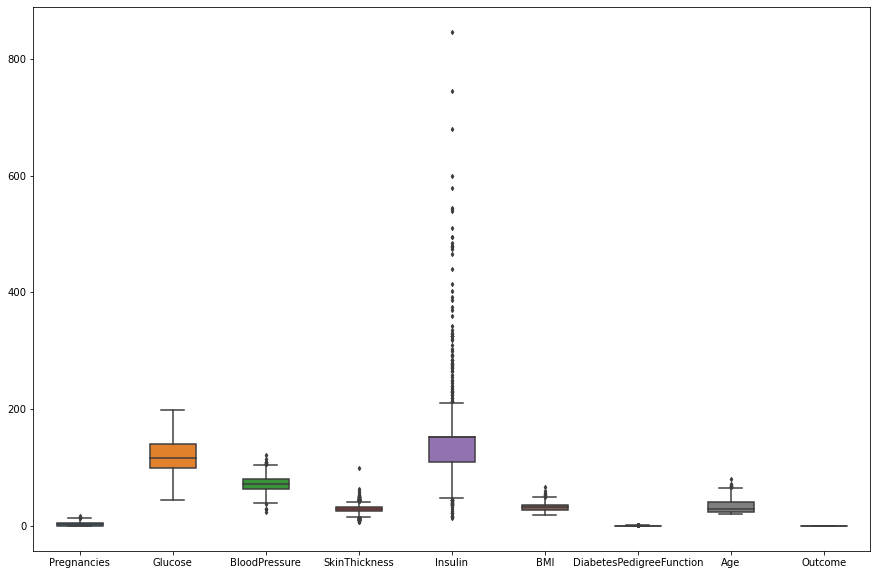

In [38]:
###################################################################

#  Plotting box plot to see if there are any outliers

###################################################################

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data1, width= 0.5,ax=ax,  fliersize=3)


In [39]:
#####################################################################

# Removing outliers in the data for the columns that have outliers and checking if outliers have been removed by calling shape method.

#####################################################################

q = data1['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data1[data1['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

print(data_cleaned.shape)

data_cleaned.head()


(674, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,151.666735,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,151.666735,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.045762,151.666735,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
5,5.0,116.0,74.0,29.045762,151.666735,25.6,0.201,30.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import linear_model
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler 

####################################
# seperating features and label/target
####################################

features=data_cleaned.drop(columns='Outcome')
target=data_cleaned.Outcome

################################
# sacling the features data 
################################
scalar=StandardScaler()
data1_scaled=scalar.fit_transform(features)



##################################################################################################

# The following code is for finding accuracy for Logistic Regression with out RandomizedSearchCV

##################################################################################################


x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.19, random_state= 355)
log_reg_1=linear_model.LogisticRegression()
log_reg_1.fit(x_train,y_train)
print('Accuracy for test data with out RandomizedSearchCV::::',log_reg_1.score(x_test,y_test))

log_reg_model_before_RSCV=log_reg_1


### The following code is for storing f1 score
y_pred=log_reg_1.predict(x_test)
print('Fl Score for Log Regression before RSCV ::::', f1_score(y_test,y_pred))
F1_LR_Before_RSCV= f1_score(y_test,y_pred)

print('-----------------------------------------------------------------------------')

##################################################################################################
# Following code is for Hyper parameter tuning for Logistic Regression with RandomizedSearchCV

# C represents the inverse of regularization strength
# l1 and l2 are penalities (lasso and ridge)
# saga is used for large data 
##################################################################################################

#C = np.logspace(0, 10, num=100)
#C=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
#c=[0.01,0.1,1.0]
C=[0.1,0.001,0.0001]
penalty = ['l2','l1']
solver = ['saga']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)
randomizedsearch = RandomizedSearchCV(log_reg_1, hyperparameters,random_state=155,verbose=1, n_jobs=-1,n_iter=100)

best_model_random = randomizedsearch.fit(x_train,y_train)
print('Best Estimator ::::',best_model_random.best_estimator_)
print('Best score::::', best_model_random.best_score_)
print('Best Params::::',best_model_random.best_params_)

print('-----------------------------------------------------------------------------')


Accuracy for test data with out RandomizedSearchCV:::: 0.813953488372093
Fl Score for Log Regression before RSCV :::: 0.6666666666666666
-----------------------------------------------------------------------------
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [41]:
##################################################################################################
# Following code is for finding model accuiracy for Logistic Regression after RandomizedSearchCV and for storing F1 score
##################################################################################################

log_reg_1=linear_model.LogisticRegression(C=0.1, penalty='l1', solver='saga')

log_reg_1.fit(x_train,y_train)
print('Accuracy for Logistic Regression after RandomizedSearchCV :::: ', log_reg_1.score(x_test,y_test))

y_pred=log_reg_1.predict(x_test)
print('Fl Score for Log Regression after RSCV ::::', f1_score(y_test,y_pred))
F1_LR_After_RSCV= f1_score(y_test,y_pred)

######  The model accuracy after RandomizedSearchCV has increased from 0.8139534 to 0.829457 

Accuracy for Logistic Regression after RandomizedSearchCV ::::  0.8294573643410853
Fl Score for Log Regression after RSCV :::: 0.6857142857142856


In [42]:
from sklearn.neighbors import KNeighborsClassifier


x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.19, random_state= 355)

##################################################################################################

# The following code is for finding accuracy for KNN with out RandomizedSearchCV

##################################################################################################

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('Acuracy for KNN before RSCV::::', knn.score(x_test,y_test))

y_pred=knn.predict(x_test)
print('Fl Score for KNN before RSCV::::', f1_score(y_test,y_pred))
F1_KNN_Before_RSCV= f1_score(y_test,y_pred)
knn_model_before_RSCV=knn

print('-----------------------------------------------------------------------------')

##################################################################################################
# Following code is for Hyper parameter tuning for KNN with RandomizedSearchCV
##################################################################################################

k_range=list(range(10,15))
param_random_2={ 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' :[11,12,13,14,15,16]            }  

randomizedsearch_2 = RandomizedSearchCV(knn, param_random_2, cv=20, scoring='accuracy', n_iter=1000, random_state=55)
randomizedsearch_2.fit(x_train, y_train)


print('Best Estimator ::::',randomizedsearch_2.best_estimator_)
print('Best score::::', randomizedsearch_2.best_score_)
print('Best Params::::',randomizedsearch_2.best_params_)

print('-----------------------------------------------------------------------------')



Acuracy for KNN before RSCV:::: 0.751937984496124
Fl Score for KNN before RSCV:::: 0.5897435897435899
-----------------------------------------------------------------------------
Best Estimator :::: KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=14)
Best score:::: 0.7691137566137566
Best Params:::: {'n_neighbors': 14, 'leaf_size': 18, 'algorithm': 'ball_tree'}
-----------------------------------------------------------------------------


In [43]:
##################################################################################################
# Following code is for finding model accuiracy for KNN after RandomizedSearchCV and storing F1 score
##################################################################################################

knn=KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=14)
knn.fit(x_train,y_train)
print('Acuuracy for KNN after RSCV::::',knn.score(x_test,y_test))

y_pred=knn.predict(x_test)
print('Fl Score for KNN after RSCV::::', f1_score(y_test,y_pred))
F1_KNN_after_RSCV= f1_score(y_test,y_pred)

Acuuracy for KNN after RSCV:::: 0.7674418604651163
Fl Score for KNN after RSCV:::: 0.5945945945945946


In [44]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier


x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.19, random_state= 355)



##################################################################################################

# The following code is for finding accuracy for Decisoin Tree with out RandomizedSearchCV

##################################################################################################

model_tree=DecisionTreeClassifier()
model_tree.fit(x_train,y_train)
print('Accuracy for Decision Tree before RSCV::::', model_tree.score(x_test,y_test))

y_pred=model_tree.predict(x_test)
print('Fl Score for Decision Tree before RSCV::::', f1_score(y_test,y_pred))
F1_DT_Before_RSCV= f1_score(y_test,y_pred)

decision_tree_model_before_RSCV=model_tree

print('-----------------------------------------------------------------------------')

##################################################################################################
# Following code is for Hyper parameter tuning for Decision Tree with RandomizedSearchCV
##################################################################################################

param_dist_3 = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

random_search_3=RandomizedSearchCV(model_tree,param_dist_3,cv=10,random_state=355)

random_search_3.fit(x_train,y_train)

print('Best Estimator ::::',random_search_3.best_estimator_)
print('Best score::::', random_search_3.best_score_)
print('Best Params::::',random_search_3.best_params_)

print('-----------------------------------------------------------------------------')



Accuracy for Decision Tree before RSCV:::: 0.6976744186046512
Fl Score for Decision Tree before RSCV:::: 0.5301204819277109
-----------------------------------------------------------------------------
Best Estimator :::: DecisionTreeClassifier(criterion='entropy', max_depth=23, min_samples_leaf=8,
                       min_samples_split=3, splitter='random')
Best score:::: 0.7359595959595959
Best Params:::: {'splitter': 'random', 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_depth': 23, 'criterion': 'entropy'}
-----------------------------------------------------------------------------


In [45]:

##################################################################################################
# Following code is for finding model accuiracy for Decision Tree after RandomizedSearchCV and storing F1 score
##################################################################################################

# 0.763367 and 0.80620
model_tree=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=8, splitter='random')

#model_tree=DecisionTreeClassifier(criterion = 'gini', max_depth =3, min_samples_leaf= 6, min_samples_split= 8, splitter ='best')
model_tree.fit(x_train,y_train)
print('Accuracy for Decision Treee after RSCV::::', model_tree.score(x_test,y_test))


y_pred=model_tree.predict(x_test)
print('Fl Score for Decision Tree after RSCV::::', f1_score(y_test,y_pred))
F1_DT_After_RSCV= f1_score(y_test,y_pred)


Accuracy for Decision Treee after RSCV:::: 0.7054263565891473
Fl Score for Decision Tree after RSCV:::: 0.5


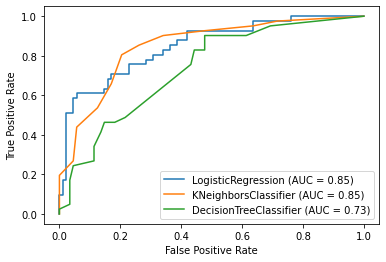

In [46]:
###################################################################################################################

# Following code is for plotting AUC and ROC curve for all 3 models i-e Logistic Regression, KNN and Decision Tree after Randomized Search CV

###################################################################################################################

from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(log_reg_1,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(model_tree,x_test,y_test,ax=disp.ax_)


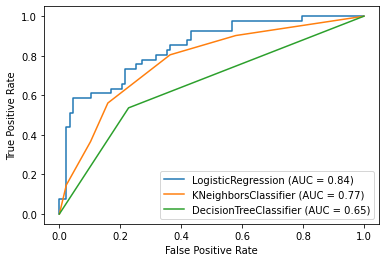

In [47]:

###################################################################################################################

# Following code is for plotting AUC and ROC curve for all 3 models i-e Logistic Regression, KNN and Decision Tree before Randomized Search CV

###################################################################################################################

disp=plot_roc_curve(log_reg_model_before_RSCV,x_test,y_test)
plot_roc_curve(knn_model_before_RSCV,x_test,y_test,ax=disp.ax_)
plot_roc_curve(decision_tree_model_before_RSCV,x_test,y_test,ax=disp.ax_)


(674, 8)


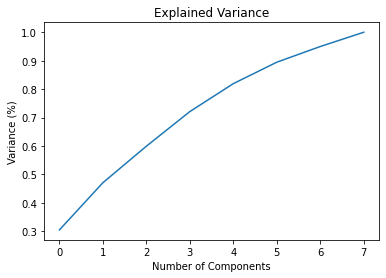

In [48]:

###################################################################################################################

# Following code is for plotting PCA figure to check if we can reduce the no of features and achieve better accuracy

###################################################################################################################

from sklearn.decomposition import PCA
print(data1_scaled.shape)


import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(data1_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()





In [49]:
# From the above figure , it is seen that for seven components itself, we can achieve maximum variance,
# but if we go for 6 componenets there is less variance achieved. Any ways we are trying PCA for both n=7 and n=6 and get the results

In [50]:
##################################################################################################

# The following code is for transforming our previous data(scaled data of features) into 7 components (columns/features) instead of 8 features 
# and see if we can achieve more accuracy

##################################################################################################

pca = PCA(n_components=7)
data1_scaled_1 = pca.fit_transform(data1_scaled)

principal_x = pd.DataFrame(data1_scaled_1,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7'])
principal_x


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7
0,1.944527,0.548036,0.302086,0.483886,-0.582683,0.485726,0.584902
1,-1.199585,-0.171191,-0.053912,-0.310534,-0.462633,-1.012239,0.570450
2,0.802954,1.227411,1.767187,0.054006,-0.798196,1.202896,0.574357
3,-2.233670,-0.151641,-0.644883,-0.526925,0.220222,-0.044525,-0.053271
4,-0.237700,0.673137,-0.186803,-0.908256,-0.295482,-0.434523,0.298618
...,...,...,...,...,...,...,...
669,3.004509,1.264230,-1.903176,-0.321159,-2.127497,-0.866582,1.036558
670,-0.132899,-0.864860,0.088716,-0.512170,0.090838,0.119027,-0.580210
671,-0.757774,1.048824,-0.176717,-0.515909,0.155605,0.270601,-0.034143
672,-0.021499,0.197116,0.511262,-0.471772,-0.649296,0.241394,0.804602


In [51]:
##################################################################################################

# The following code is for finding accuracy for Logistic Regression with PCA=7

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)

logistic_model=linear_model.LogisticRegression()
logistic_model.fit(x_train,y_train)
print('Accuracy for Logistic Regression with PCA Before RSCV::::',logistic_model.score(x_test,y_test))

y_pred=logistic_model.predict(x_test)
F1_LR_Before_RSCV_with_PCA_7=f1_score(y_test,y_pred,average='macro')


Accuracy for Logistic Regression with PCA Before RSCV:::: 0.813953488372093


In [52]:
##################################################################################################

# The following code is for finding accuracy for KNN with PCA=7

##################################################################################################


x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.30, random_state= 355)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('Accuracy for KNN with PCA before RSCV::::',knn.score(x_test,y_test))


y_pred=knn.predict(x_test)
F1_KNN_Before_RSCV_with_PCA_7=f1_score(y_test,y_pred,average='macro')



Accuracy for KNN with PCA before RSCV:::: 0.7487684729064039


In [53]:
##################################################################################################

# The following code is for finding accuracy for Decision Tree with PCA=7

##################################################################################################


from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.30, random_state= 355)

model_tree=DecisionTreeClassifier()
model_tree.fit(x_train,y_train)
print('Accuracy for Decision Tree with PCA before RSCV::::',model_tree.score(x_test,y_test))

y_pred=model_tree.predict(x_test)
F1_DT_Before_RSCV_with_PCA_7=f1_score(y_test,y_pred,average='macro')






Accuracy for Decision Tree with PCA before RSCV:::: 0.6995073891625616


In [54]:
##################################################################

#   F1 scores for all 3 models in various possibilities:

#################################################################

In [55]:
print('F1 score for Logistic Regression before Randomized Search CV : ',F1_LR_Before_RSCV)
print('F1 score for Logistic Regression after Randomized Search CV : ',F1_LR_After_RSCV)
print('F1 score for KNN before Randomized Search CV : ',F1_KNN_Before_RSCV)
print('F1 score for KNN after Randomized Search CV : ',F1_KNN_after_RSCV)
print('F1 score for Decision Tree before Randomized Search CV : ',F1_DT_Before_RSCV)
print('F1 score for Decision Tree after Randomized Search CV : ',F1_DT_After_RSCV)

############# F1 scores with PCA =7

print('-------------------------------------------------------------------------')

print('F1 score for Logistic Regression before Randomized Search CV with PCA: ',F1_LR_Before_RSCV_with_PCA_7)
print('F1 score for KNN before Randomized Search CV with PCA: ',F1_KNN_Before_RSCV_with_PCA_7)
print('F1 score for Decision Tree before Randomized Search CV with PCA: ',F1_DT_Before_RSCV_with_PCA_7)


F1 score for Logistic Regression before Randomized Search CV :  0.6666666666666666
F1 score for Logistic Regression after Randomized Search CV :  0.6857142857142856
F1 score for KNN before Randomized Search CV :  0.5897435897435899
F1 score for KNN after Randomized Search CV :  0.5945945945945946
F1 score for Decision Tree before Randomized Search CV :  0.5301204819277109
F1 score for Decision Tree after Randomized Search CV :  0.5
-------------------------------------------------------------------------
F1 score for Logistic Regression before Randomized Search CV with PCA:  0.7688172043010753
F1 score for KNN before Randomized Search CV with PCA:  0.7025769197621305
F1 score for Decision Tree before Randomized Search CV with PCA:  0.6505235232692688


In [56]:
# F1 score is maximumm for Logistic Regression before Randomized Search CV with PCA with value:  0.7688172043010753

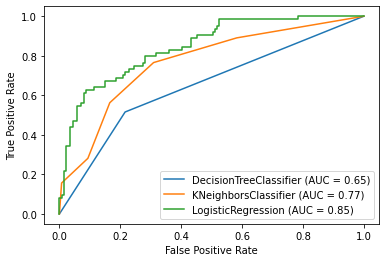

In [57]:
##################################################################################################

# The following code is for plotting roc curve for logistic, knn and decision tree with PCA=7

# The following code plots all roc curve to calculate AUC score for all the 3 models in same figure 

##################################################################################################



disp=plot_roc_curve(model_tree,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(logistic_model,x_test,y_test,ax=disp.ax_)

In [58]:
##################################################################################################

# The following code splits the principal data and performs the Randomized Search CV for Logistic Regression with PCA (n=7)
# We are using same 'randomizedsearch' object that we used previously for Logistic Regression above

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)

best_model_random = randomizedsearch.fit(x_train,y_train)
print('Best Estimator::::',best_model_random.best_estimator_)
print('Best score::::', best_model_random.best_score_)
print('Best Params::::',best_model_random.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Estimator:::: LogisticRegression(C=0.1, solver='saga')
Best score:::: 0.7688073394495414
Best Params:::: {'solver': 'saga', 'penalty': 'l2', 'C': 0.1}


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [59]:
###########################################################################################################################

# The following code finds the model accuracy for Randomized Search CV with PCA (n=7) with best params for Logistic Regression

###########################################################################################################################

logistic_model=linear_model.LogisticRegression(C=0.1, penalty='l2', solver='saga')
logistic_model.fit(x_train,y_train)
print(' Accuracy score for Logistic Regression after RandomizedSearchCV with PCA::::', logistic_model.score(x_test,y_test))


 Accuracy score for Logistic Regression after RandomizedSearchCV with PCA:::: 0.8217054263565892


In [60]:
##################################################################################################

# The following code splits the principal data and performs the Randomized Search CV for KNN with PCA (n=7)
# We are using same 'randomizedsearch_2' object that we used previously for KNN above

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)

best_model_random = randomizedsearch_2.fit(x_train,y_train)
print('Best Estimator::::',best_model_random.best_estimator_)
print('Best score::::', best_model_random.best_score_)
print('Best Params::::',best_model_random.best_params_)

Best Estimator:::: KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=14)
Best score:::: 0.7581349206349206
Best Params:::: {'n_neighbors': 14, 'leaf_size': 18, 'algorithm': 'ball_tree'}


In [61]:
##################################################################################################

# The following code finds the accuracy for Randomized Search CV for KNN with PCA (n=7)

##################################################################################################

knn=KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=14)
knn.fit(x_train,y_train)
print('Acuuracy for KNN with PCA after RSCV::::',knn.score(x_test,y_test))

Acuuracy for KNN with PCA after RSCV:::: 0.7829457364341085


In [62]:
##################################################################################################

# The following code splits the principal data and performs the Randomized Search CV for Decision Tree with PCA (n=7)
# We are using same 'random_search_3' object that we used previously for Decision Tree above

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)

random_search_3.fit(x_train,y_train)
print('Best Estimator ::::',random_search_3.best_estimator_)
print('Best score::::', random_search_3.best_score_)
print('Best Params::::',random_search_3.best_params_)

print('-----------------------------------------------------------------------------')


Best Estimator :::: DecisionTreeClassifier(max_depth=20, min_samples_leaf=7, min_samples_split=3)
Best score:::: 0.7523569023569024
Best Params:::: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_depth': 20, 'criterion': 'gini'}
-----------------------------------------------------------------------------


In [63]:
##################################################################################################

# The following code finds the accuracy for Randomized Search CV for Decision Tree with PCA (n=7)

##################################################################################################

model_tree= DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=9,min_samples_split=5, splitter='best')
model_tree.fit(x_train,y_train)
print('Acuuracy for Decision Tree with PCA after RSCV::::',model_tree.score(x_test,y_test))

Acuuracy for Decision Tree with PCA after RSCV:::: 0.7131782945736435


In [ ]:
# NOTE:: Decision Tree Hyper Parameter tuning is giving different results that is different combinations when executed again and again.